# INFO 3401 – Class 16: In-class notebook

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This week we'll explore an alternative genre of in-class activity involving guided exploratory data analysis. We will work with a new dataset, review previous weeks' material, and apply the concepts introduced in the pre-class lectures. These lectures and notebooks will be recorded and posted to Canvas. We'll also experiment with the notebooks being cumulative, meaning the work we start on Monday we will try to continue through Wednesday and Friday.

* Review concepts from previous modules and classes on data reshaping, visualization, joining, *etc.*
* Reinforce new concepts about working with temporal data
* Develop strategies for performing exploratory data analyses on new datasets
* Think critically about the limitations of the data and implications this has on our interpretations

## Background
Arielle Daskal reminded me about the very powerful and interesting [NYC Taxi Trip Records data](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). These data capture the pick-up and drop-off timestamp, locations, distances, fares, and passenger counts for the millions of NYC taxi, limo, and rideshare trips going back to 2009*. This data is nice because it is [well-documented](https://www1.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf), very detailed, covers a long period of time, and has temporal and spatial variance.

The data is reported out at a monthly frequency and broken down by yellow cabs (generally Manhattan), green cabs (generally the NYC boroughs), and for-hire (rideshares). I want to focus in particular on the ridership data in the lead-up to and aftermath of the COVID-19-related quarantines and shutdowns in March and April 2020. What kinds of travel patterns can we discover? Which of these patterns were most and least disrupted by COVID?

## Load libraries

In [1]:
# Our usual libraries for working with data
import pandas as pd
import numpy as np

# Our usual libraries for visualizing data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

## Load data

These are big files (>200MB!) so be careful and patient when running these code blocks to retrieve the data!

Retrieve the yellow cab data for March: https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv

Print the shape and inspect the head.

In [2]:
yellow_df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv')

print(yellow_df.shape)

yellow_df.head()

C:\Anaconda App\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3007292, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


Repeat for the green cab data: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2020-03.csv

In [3]:
green_df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2020-03.csv')

print(green_df.shape)

green_df.head()

(223406, 20)


C:\Anaconda App\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2020-03-01 00:20:18,2020-03-01 00:45:29,N,1.0,41,13,1.0,8.24,26.5,0.5,0.5,7.64,0.0,NaN,0.3,38.19,1.0,1.0,2.75
1,2.0,2020-03-01 00:15:42,2020-03-01 00:44:36,N,1.0,181,107,1.0,4.87,21.0,0.5,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
2,2.0,2020-03-01 00:36:18,2020-03-01 00:41:03,N,1.0,41,166,1.0,0.69,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2.0,1.0,0.00
3,1.0,2020-03-01 00:22:14,2020-03-01 00:32:57,N,1.0,129,7,1.0,1.80,9.0,0.5,0.5,0.00,0.0,NaN,0.3,10.30,2.0,1.0,0.00
4,2.0,2020-03-01 00:07:22,2020-03-01 00:14:16,N,1.0,74,152,1.0,1.25,7.0,0.5,0.5,2.49,0.0,NaN,0.3,10.79,1.0,1.0,0.00


Repeat for the for-hire vehicle (FHV) data: https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2020-03.csv

In [4]:
fhv_df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2020-03.csv')

print(fhv_df.shape)

fhv_df.head()

(1251108, 6)


,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,B00013,2020-03-01 00:52:09,2020-03-01 01:18:43,264.0,264.0,NaN
1,B00013,2020-03-01 00:59:46,2020-03-01 01:14:18,264.0,264.0,NaN
2,B00013,2020-03-01 00:48:29,2020-03-01 01:33:03,264.0,264.0,NaN
3,B00013,2020-03-01 00:51:41,2020-03-01 01:32:46,264.0,264.0,NaN
4,B00013,2020-03-01 00:58:29,2020-03-01 01:36:04,264.0,264.0,NaN


Also grab the Taxi Zone Lookup Table: https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv

In [5]:
taxi_lookup_df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv',index_col=0)

taxi_lookup_df.head()

,Borough,Zone,service_zone
LocationID,,,
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone


## Inspect the columns for values and overlaps across data

In [6]:
yellow_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


In [7]:
yellow_df['VendorID'].value_counts()

2.0    1981578
1.0     988227
Name: VendorID, dtype: int64

In [8]:
yellow_df['passenger_count'].value_counts().sort_index()

0.0      63431
1.0    2187343
2.0     407509
3.0     106517
4.0      48434
5.0      96974
6.0      59573
7.0         10
8.0          5
9.0          9
Name: passenger_count, dtype: int64

In [9]:
yellow_df['RatecodeID'].value_counts().sort_index()

1.0     2886773
2.0       58968
3.0        5854
4.0        2228
5.0       15847
6.0          15
99.0        120
Name: RatecodeID, dtype: int64

In [10]:
yellow_df['store_and_fwd_flag'].value_counts()

N    2941828
Y      27977
Name: store_and_fwd_flag, dtype: int64

In [11]:
yellow_df['payment_type'].value_counts()

1.0    2211029
2.0     732070
3.0      17044
4.0       9662
Name: payment_type, dtype: int64

## Plot some distributions of columns with continuous data

Use [hist()](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms) or [plot.kde()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.kde.html) to explore the distributions of the continuous variables.

In [12]:
yellow_df['total_amount'].describe()

count    3.007292e+06
mean     1.884122e+01
std      6.945971e+02
min     -1.260300e+03
25%      1.116000e+01
50%      1.430000e+01
75%      1.985000e+01
max      1.000004e+06
Name: total_amount, dtype: float64

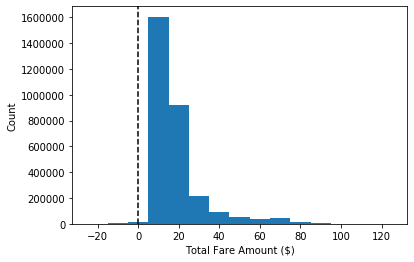

In [13]:
ax = yellow_df['total_amount'].hist(bins=np.arange(-25,131,10))
ax.set_ylabel('Count')
ax.set_xlabel('Total Fare Amount ($)')
ax.grid(False)
ax.axvline(0,c='k',ls='--')

In [14]:
yellow_df['trip_distance'].describe()

count    3.007292e+06
mean     3.116722e+00
std      2.069343e+02
min      0.000000e+00
25%      9.900000e-01
50%      1.670000e+00
75%      3.020000e+00
max      2.698037e+05
Name: trip_distance, dtype: float64

In [15]:
yellow_df['trip_distance'].max()

269803.73

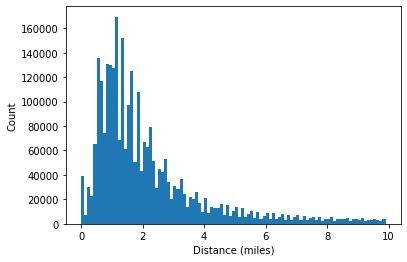

In [16]:
ax = yellow_df['trip_distance'].hist(bins=np.arange(0,10,.1))
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Count')
ax.grid(False)

## Cleanup based on inspection

Remove, rename, or otherwise revise the DataFrame to clean up any problematic columns or rows.

In [17]:
clean_yellow_df = yellow_df[yellow_df['trip_distance'] < 200]

yellow_df.shape, clean_yellow_df.shape

((3007292, 18), (3007279, 18))

In [18]:
clean_yellow_df = clean_yellow_df[clean_yellow_df['total_amount'] < 250]
clean_yellow_df.shape

(3007017, 18)

## Reshape the data

Make a pivot table with the count of rides and the pickup (PU) and drop-off (DO) locations as columns and indexes.

In [19]:
clean_yellow_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


In [47]:
pudo_pivot_df = pd.pivot_table(clean_yellow_df,
                               index = 'PULocationID',
                               columns = 'DOLocationID',
                               values = 'passenger_count',
                               aggfunc = 'sum'
                              )

pudo_pivot_df.head()

DOLocationID,1,2,3,4,5,6,7,8,9,10,...,256,257,258,259,260,261,262,263,264,265
PULocationID,,,,,,,,,,,,,,,,,,,,,
1,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,62.0,12.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,11.0,NaN,NaN,327.0,NaN,NaN,18.0,NaN,NaN,0.0,...,73.0,8.0,NaN,1.0,2.0,46.0,45.0,100.0,14.0,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make another pivot table with the median "total_amount" by PU and DO location.

In [48]:
total_amount_pivot_df = pd.pivot_table(clean_yellow_df,
                                       index = 'PULocationID',
                                       columns = 'DOLocationID',
                                       values = 'total_amount',
                                       aggfunc = 'min'
                                      )

total_amount_pivot_df.head()

DOLocationID,1,2,3,4,5,6,7,8,9,10,...,256,257,258,259,260,261,262,263,264,265
PULocationID,,,,,,,,,,,,,,,,,,,,,
1,-125.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.44,0.3,0.30
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.85,38.03,NaN,NaN,NaN,NaN,NaN
4,74.88,NaN,NaN,-9.3,NaN,NaN,24.8,NaN,NaN,43.27,...,13.8,29.3,NaN,59.12,24.30,12.8,17.3,17.30,0.3,64.77
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Make heatmaps from the reshaped data

Use seaborn's powerful [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function ([also](https://seaborn.pydata.org/examples/spreadsheet_heatmap.html)).

In [49]:
# https://stackoverflow.com/a/60931906/1574687
from matplotlib.colors import LogNorm

In [56]:
pudo_pivot_df.values.fillna(0).value.flatten().min()

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

ZeroDivisionError: float division by zero

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000024E650AE1F8> (for post_execute):


ValueError: values must all be positive

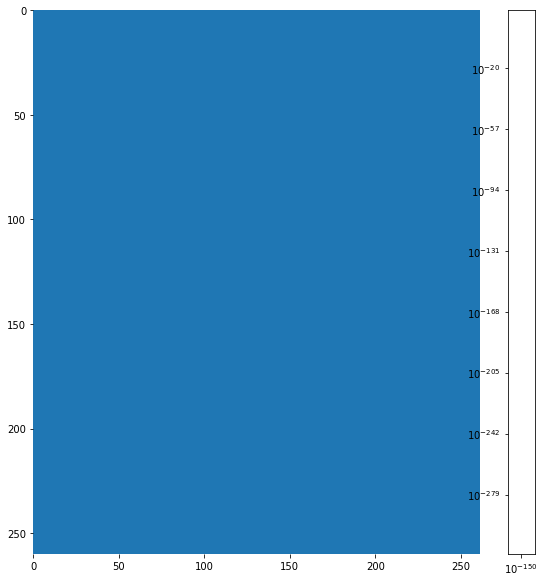

In [54]:
f,ax = plt.subplots(figsize=(10,10))

sb.heatmap(pudo_pivot_df.fillna(0),
           #norm = LogNorm(1e0,1e5),
           ax=ax
           #vmin = 0,
           #vmax = 50000
          )

Can also use seaborn's [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html) to re-organize the rows and columns to cluster similar values together and dissimilar rows apart.

ZeroDivisionError: float division by zero

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000024E650AE1F8> (for post_execute):


ValueError: values must all be positive

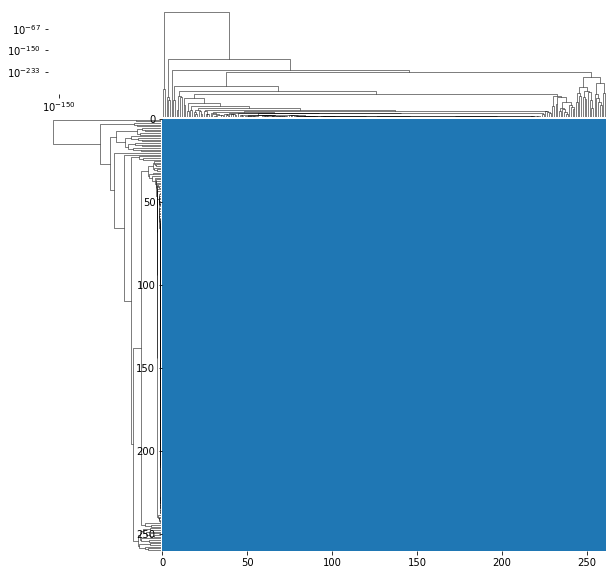

In [24]:
sb.clustermap(pudo_pivot_df.fillna(0),
              norm = LogNorm(1e0,1e5),
              )

## Interpret the heatmaps

* Strong diagonal = people staying in the same zone
* Null values = some combinations of movement aren't observed at all

## Boolean index to airport trips

Use the Taxi Zone Lookup Table to identify zone IDs corresponding with trips starting or ending at airports.

How do the distributions of fares differ for airport trips compared to the entire population?

## Inspect the pickup and dropoff datetimes

In [25]:
clean_yellow_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


In [26]:
clean_yellow_df.loc[0,'tpep_pickup_datetime']

'2020-03-01 00:31:13'

## Convert to `Timestamp`s using `to_datetime`

In [27]:
clean_yellow_df['tpep_pickup_datetime']

0          2020-03-01 00:31:13
1          2020-03-01 00:08:22
2          2020-03-01 00:52:18
3          2020-03-01 00:47:53
4          2020-03-01 00:43:19
                  ...         
3007287    2020-03-31 23:21:00
3007288    2020-03-31 23:57:00
3007289    2020-03-31 23:22:01
3007290    2020-03-31 23:18:53
3007291    2020-03-31 23:11:00
Name: tpep_pickup_datetime, Length: 3007017, dtype: object

In [28]:
clean_yellow_df['pu_timestamp'] = pd.to_datetime(clean_yellow_df['tpep_pickup_datetime'])
clean_yellow_df['do_timestamp'] = pd.to_datetime(clean_yellow_df['tpep_dropoff_datetime'])

## Make new columns for hour, weekday, and date of PU and DO

In [29]:
clean_yellow_df.loc[0,'pu_timestamp'].hour

0

In [30]:
clean_yellow_df.loc[0,'pu_timestamp'].weekday()

6

In [31]:
clean_yellow_df.loc[0,'pu_timestamp'].date()

datetime.date(2020, 3, 1)

In [32]:
clean_yellow_df['pu_hour'] = clean_yellow_df['pu_timestamp'].apply(lambda x:x.hour)
clean_yellow_df['pu_weekday'] = clean_yellow_df['pu_timestamp'].apply(lambda x:x.weekday())
clean_yellow_df['pu_date'] = clean_yellow_df['pu_timestamp'].apply(lambda x:x.date())

In [33]:
clean_yellow_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pu_timestamp,do_timestamp,pu_hour,pu_weekday,pu_date
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,...,2.00,0.0,0.3,27.80,2.5,2020-03-01 00:31:13,2020-03-01 01:01:42,0,6,2020-03-01
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,...,0.00,0.0,0.3,3.80,0.0,2020-03-01 00:08:22,2020-03-01 00:08:49,0,6,2020-03-01
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,...,1.95,0.0,0.3,11.75,2.5,2020-03-01 00:52:18,2020-03-01 00:59:16,0,6,2020-03-01
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,...,1.76,0.0,0.3,10.56,2.5,2020-03-01 00:47:53,2020-03-01 00:50:57,0,6,2020-03-01
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,...,4.05,0.0,0.3,24.35,2.5,2020-03-01 00:43:19,2020-03-01 00:58:27,0,6,2020-03-01


## Make another pivot table and heatmap for hour and date

Pivot hour as an index and date as a column and experiment with the number of trips, fare, passengers, *etc*. as values.

In [36]:
weekday_hour_df = pd.pivot_table(clean_yellow_df,
                                 index = 'pu_hour',
                                 columns = 'pu_weekday',
                                 values = 'passenger_count',
                                 aggfunc = 'sum'
                                )

weekday_hour_df.columns = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_hour_df

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
pu_hour,,,,,,,
0,8884.0,10115.0,10983.0,12038.0,14271.0,20651.0,41670.0
1,5319.0,5069.0,5649.0,6386.0,7988.0,16485.0,34115.0
2,3305.0,3124.0,3565.0,3851.0,5190.0,13141.0,15046.0
3,2643.0,2108.0,2159.0,2666.0,3676.0,8539.0,23645.0
4,2990.0,2665.0,2692.0,2858.0,3719.0,5581.0,14537.0
5,6811.0,5743.0,5525.0,5518.0,5316.0,3225.0,5958.0
6,17507.0,16540.0,15479.0,15068.0,14206.0,5212.0,6756.0
7,33169.0,32063.0,30038.0,28649.0,25224.0,8255.0,9737.0
8,41646.0,39623.0,37949.0,36626.0,32958.0,12317.0,14288.0


Heatmap it. Also experiment with some other [colormaps](https://matplotlib.org/tutorials/colors/colormaps.html).

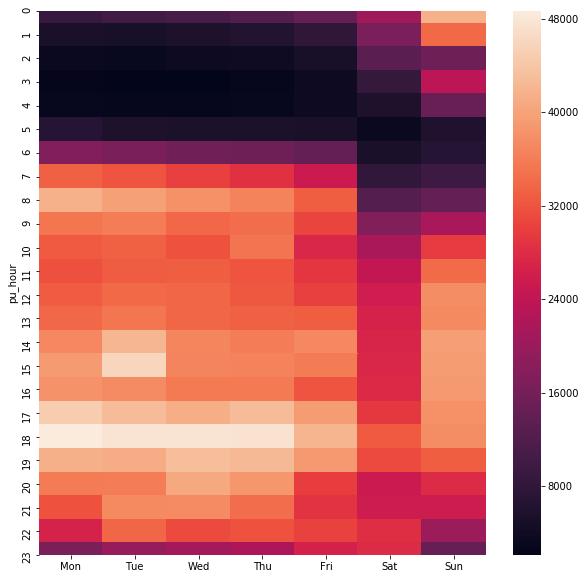

In [40]:
f,ax = plt.subplots(figsize=(10,10))

sb.heatmap(weekday_hour_df,ax=ax) # cmap = other color

Experiment with some other parameters within `heatmap`.

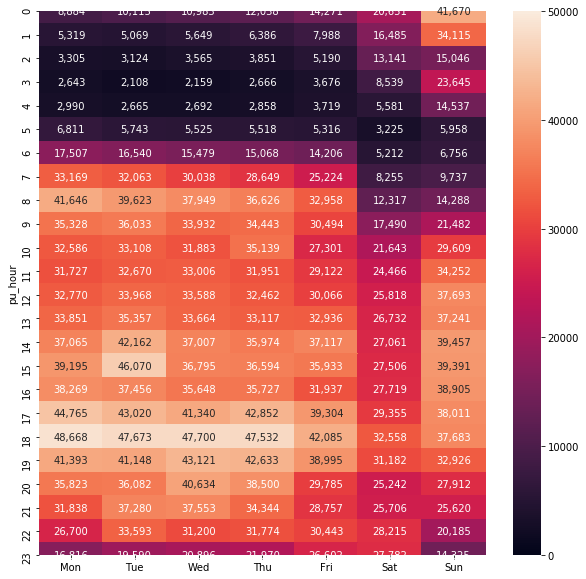

In [38]:
f,ax = plt.subplots(figsize=(10,10))
sb.heatmap(weekday_hour_df,ax=ax,vmin=0,vmax=50000,annot=True,fmt=',.0f')

Interpret it.

## Reshape to get the daily number of rides, fares, passengers, *etc*.

Use pivot table or groupby-aggregate to get some daily counts of some activity.

In [39]:
clean_yellow_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pu_timestamp,do_timestamp,pu_hour,pu_weekday,pu_date
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,...,2.00,0.0,0.3,27.80,2.5,2020-03-01 00:31:13,2020-03-01 01:01:42,0,6,2020-03-01
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,...,0.00,0.0,0.3,3.80,0.0,2020-03-01 00:08:22,2020-03-01 00:08:49,0,6,2020-03-01
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,...,1.95,0.0,0.3,11.75,2.5,2020-03-01 00:52:18,2020-03-01 00:59:16,0,6,2020-03-01
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,...,1.76,0.0,0.3,10.56,2.5,2020-03-01 00:47:53,2020-03-01 00:50:57,0,6,2020-03-01
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,...,4.05,0.0,0.3,24.35,2.5,2020-03-01 00:43:19,2020-03-01 00:58:27,0,6,2020-03-01


In [45]:
daily_passenger_counts = clean_yellow_df.groupby('pu_date').agg({"passenger_count":'sum'})
daily_passenger_counts.index = [pd.Period(i, 'D') for i in daily_passenger_counts.index]

daily_passenger_counts.loc['2020-03-01':'2020-03-31']

,passenger_count
2020-03-01,277623.0
2020-03-02,280112.0
2020-03-03,321559.0
2020-03-04,329582.0
2020-03-05,353260.0
2020-03-06,359267.0
2020-03-07,324836.0
2020-03-08,254339.0
2020-03-09,252597.0
2020-03-10,263721.0


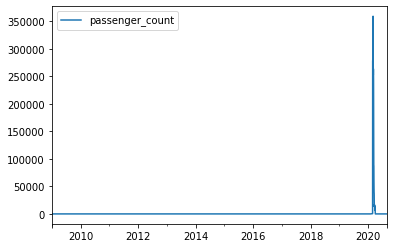

In [46]:
daily_passenger_counts.plot()

## Visualize this groupby as a time-series

Make a plot with dates as the x-axis and count of rides, total fare, total passengers, *etc*. as the y-axis.

Interpet some salient features.

## Compare yellow to another kind of mobility service (green, FHV)

Clean.

In [ ]:
feb_mar_apr_yellow_df = pd.concat([yellow_feburary_df, yellow_df, yellow_april_df])
print(feb_mar)

Reshape.

Visualize.

Interpret!

## Add in data from February and April 2020

Retrieve.

In [141]:
yellow_february_df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-02.csv')
yellow_april_df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-04.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Clean.

Concatenate with the March 2020 data.

Pivot table or groupby-aggregate and make a visualization of the data over another month of time.

Interpret!

## Make a rolling average of trips

Experiment with differently-sized windows to find an appropriate level of detail and smoothness.

## Compare to another dataset

Apple has been publishing [mobility reports](https://covid19.apple.com/mobility) of "the number of requests made to Apple Maps for directions in select countries/regions, sub-regions, and cities.

Download this data (Apple hides the link, so you need to download it to your Class notebook folder).

In [123]:
apple_df = pd.read_csv('applemobilitytrends-2020-09-28.csv')
apple_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,164.99,160.00,126.60,128.29,122.76,118.41,122.77,117.15,123.03,117.30
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,157.44,141.41,158.68,149.81,146.82,138.76,148.06,124.99,115.65,144.95
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,75.11,46.99,59.23,60.17,62.01,62.72,68.81,64.62,38.49,54.62
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,58.01,41.11,50.83,50.00,53.50,53.18,51.42,44.79,28.95,48.11
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,82.47,89.67,91.87,93.99,95.72,102.71,102.03,87.47,95.06,97.69


Clean the data to only include NYC

Reshape the data so the timestamps are rows and the transportation_type are columns.

Visualize the three transportation_type Series changes over time.

Join/align with the NYC cab data.

Visualize and interpret.

## Resample the data

Up-sample or down-sample the data from the daily frequency to another frequency.